### Data analysis in astronomy at NTU 

Week 4

Ting-Wen Lan 

Part 1: Verifying the error of the mean and bootstrap method

Part 2: Pearson correlation coefficient

This notebook is for exploring the correlation coefficients

In [18]:
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import my_plot_style as mps
import healpy as hp
import matplotlib.cm as cm
import importlib
import scipy.stats as ss
importlib.reload(mps)

<module 'my_plot_style' from '/Users/twlan/Dropbox/Astro_Research/code/my_plot_style.py'>

# Exercise 1: 
### a. Use random generator to perform a simple simulation and demonstrate that 
### the error of the mean $\sigma_{mean} = \frac{\sigma}{\sqrt{N}}$

### b. Write a code to show (1) the bootstrap error is consistent with the theoretical value and (2) the bootstrap erorr as a function of bootstrap time.

# Gaussian / normal distribution
## $Prob(x) =\frac{1}{\sigma \sqrt(2\pi)} exp[-\frac{(x-\mu)^{2}}{2\sigma^{2}}]$

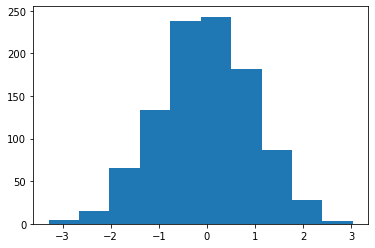

In [4]:
# a.
mu = 0
sigma = 1
n_point = 1000
random_data = np.random.normal(mu,sigma,n_point)
_ = plt.hist(random_data)

In [5]:
print('Mean = %0.3f' % (np.mean(random_data)))
print('the standard deviation=%0.3f' % (np.std(random_data)))
print('the error of the mean=%0.3f' % (np.std(random_data)/np.sqrt(len(random_data))))

Mean = -0.023
the standard deviation=0.974
the error of the mean=0.031


### You can run many simuations and look at the distribution of the mean and the standard deviation of the distribution

### Hint: You can produce a random dataset with N data points and calculate the mean value and 
### repeat the calculation many times. 
### Output should be a distribution of mean values. 
### Get the standard deviation of the mean values

In [7]:
# b. Bootstrap code

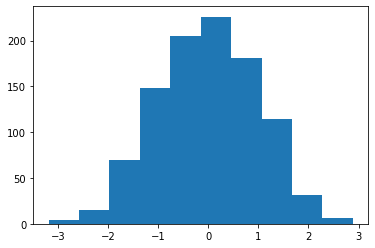

In [12]:
np.random.seed(20)
mu = 0
sigma = 1
n_point = 1000
your_data = np.random.normal(mu,sigma,n_point)
_ = plt.hist(your_data)

### Using the bootstrap method to estimate the error of the mean of this data set and estimate the bootstrap error as a function of bootstrap time

### -----------------------------------------------------------------------------------------------------

# Exercise 2 

### https://www.dropbox.com/s/h7545q0vzcqhi38/sky_maps_new_64_v6.fits?dl=0

In [20]:
ISM = pf.getdata('./data/sky_maps_new_64_v6.fits',1)

In [21]:
EBV = ISM['SFD']
HI = ISM['HI']/1e21

conversion_factor = 2*1e20/1e21
H2 = ISM['CO10']*conversion_factor


/var/folders/xp/28bc3qgn3dx_b_3c82j9rs680000gn/T/ipykernel_60657/1620817260.py:3: RuntimeWarning: invalid value encountered in log10
  hp.mollview(np.log10(H2*1e21),min=19,max=22,title='H2',cmap=cm.jet,unit='$log_{10} N_{H2}$')


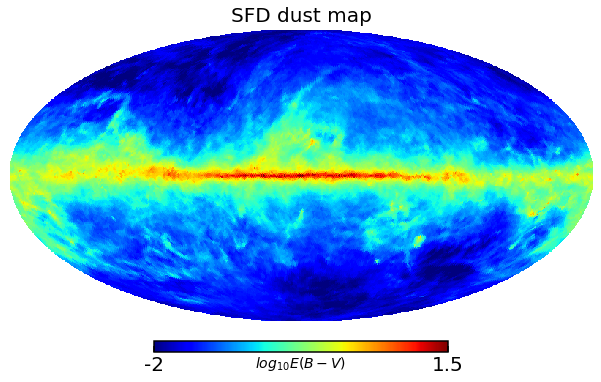

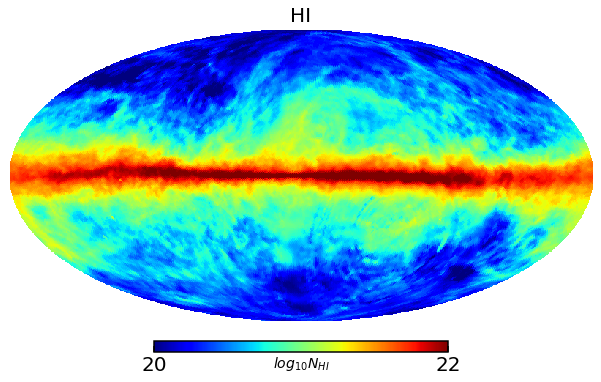

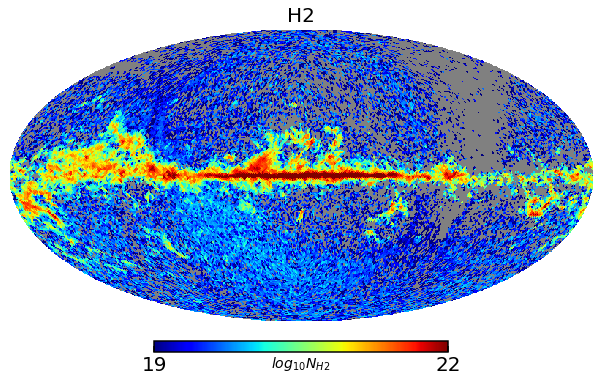

In [22]:
hp.mollview(np.log10(EBV),min=-2,max=1.5,title='SFD dust map',cmap=cm.jet,unit='$log_{10} E(B-V)$')
hp.mollview(np.log10(HI*1e21),min=20,max=22,title='HI',cmap=cm.jet,unit='$log_{10} N_{HI}$')
hp.mollview(np.log10(H2*1e21),min=19,max=22,title='H2',cmap=cm.jet,unit='$log_{10} N_{H2}$')

Text(0, 0.5, '$N_{H2}$ [$10^{21} \\rm cm^{-2}$]')

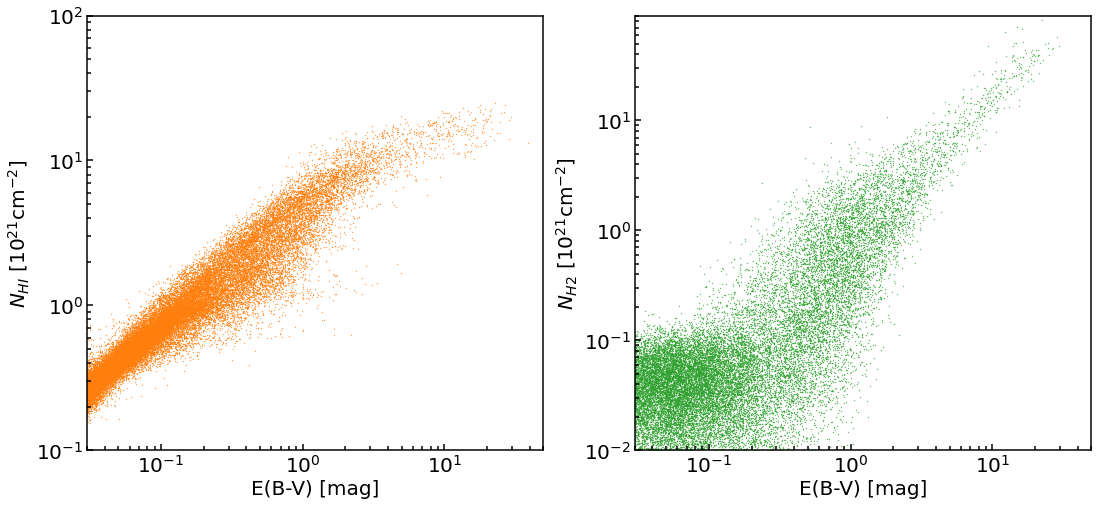

In [19]:
plt.figure(figsize=(18,8))
mps.my_plot_style()
plt.subplots_adjust(hspace=0)
plt.subplot(1,2,1)

plt.scatter(EBV,HI,s=0.1,c='C1')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.03,50)
plt.xlabel('E(B-V) [mag]',fontsize=20)
plt.ylim(0.1,100)
plt.ylabel('$N_{HI}$ [$10^{21} \\rm cm^{-2}$]',fontsize=20)

mps.my_plot_style()



plt.subplot(1,2,2)
plt.scatter(EBV,H2,s=0.1,c='C2')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.03,50)
plt.ylim(0.01,90)
plt.xlabel('E(B-V) [mag]',fontsize=20)
plt.ylabel('$N_{H2}$ [$10^{21} \\rm cm^{-2}$]',fontsize=20)

### https://www.dropbox.com/s/h7545q0vzcqhi38/sky_maps_new_64_v6.fits?dl=0
### 1. Write your own code to calculate Pearson correlation coefficient between (EBV, HI) (EBV, H2)
### 2. Using boostrap to estimate the uncertainty
### 3. Compare the coefficient from your code and from scipy.stats.pearsonr

In [23]:
ISM = pf.getdata('./data/sky_maps_new_64_v6.fits',1)

In [24]:
EBV = ISM['SFD']
HI = ISM['HI']/1e21

conversion_factor = 2*1e20/1e21 ### A factor to convert CO to H2
H2 = ISM['CO10']*conversion_factor

In [25]:
def your_pearsonr(x,y):
    return pearson_correlation_coefficient

In [32]:
your_pearsonr(EBV,HI)
your_pearsonr(EBV,H2)

NameError: name 'pearson_correlation_coefficient' is not defined

In [30]:
print(ss.pearsonr(EBV,HI))
print(ss.pearsonr(EBV,H2))

(0.7668333406050056, 0.0)
(0.865132927235396, 0.0)
